**1. Exploratory data analysis**

In [ ]:
#Import Tools for project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv("/content/creditcard.csv")

In [ ]:
#Exploring the data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


**Handling Missing Values**

In [ ]:
df.isnull().values.any()

False

In [ ]:
df.dropna()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


**Checking the distribution of the classes**

In [ ]:
#Checking the distribution of target class
cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100,2)

In [ ]:
print('Case Count\n')
print('Total Number of Cases are {}'. format(cases))
print('Number of Non-Fraud Cases are {}'. format(nonfraud_count))
print('Number of Fraud Cases are {}'. format(fraud_count))
print('Percentage of Fraud Cases are {}'. format(fraud_percentage))

Case Count

Total Number of Cases are 284807
Number of Non-Fraud Cases are 284315
Number of Fraud Cases are 492
Percentage of Fraud Cases are 0.17


From these calculation it clearly stated that only 492 are fraudulent cases which only accounts for 0.17%. This illustrate an unbalanced data.

Text(0.5, 1.0, 'Class imbalance visualization')

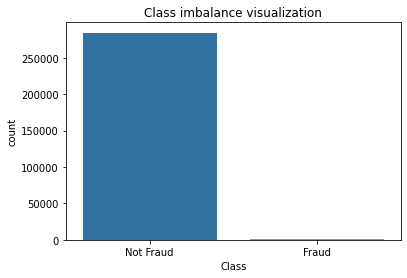

In [ ]:
#plotting a graph for the target variable
ax = sns.countplot(x='Class', data=df)
ax.set_xticklabels(['Not Fraud', 'Fraud'])
ax.set_title('Class imbalance visualization')

In [ ]:
#Showing the detailed percentages
nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

print('Case Amount Statistics')
print('\nNon-fraud Case Amount Statistics')
print(nonfraud_cases['Amount'].describe())
print('\nFraud Case Amount Statistics')
print(fraud_cases['Amount'].describe())

Case Amount Statistics

Non-fraud Case Amount Statistics
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

Fraud Case Amount Statistics
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


**Outlier Treatment**

Outlier treatment is unecessary for this dataset, since the raw dataset is already PCA transformed. Therefore, we can assume that the outlier values are already taken care of during the transformation.

**Observe the distribution classes with time**

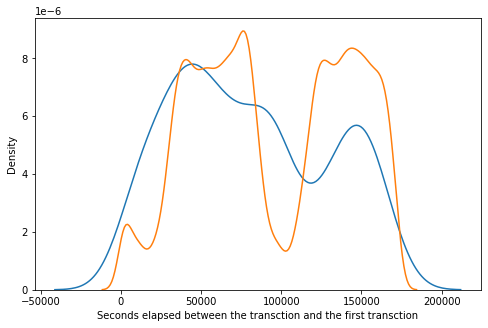

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.distplot(fraud_cases['Time'],label='fraudulent',hist=False)
ax = sns.distplot(nonfraud_cases['Time'],label='non fraudulent',hist=False)
ax.set(xlabel='Seconds elapsed between the transction and the first transction')
plt.show()

*Analysis*

From the raw dataset, Time is given as a timestamp. There the value is convert to local data and extract the hours in the attempt to identify if if the hour of the transaction is correlated with the likelability that the transaction is fraudulent

In [ ]:
from datetime import datetime
df["Hour"] = df["Time"].apply(datetime.fromtimestamp).dt.hour

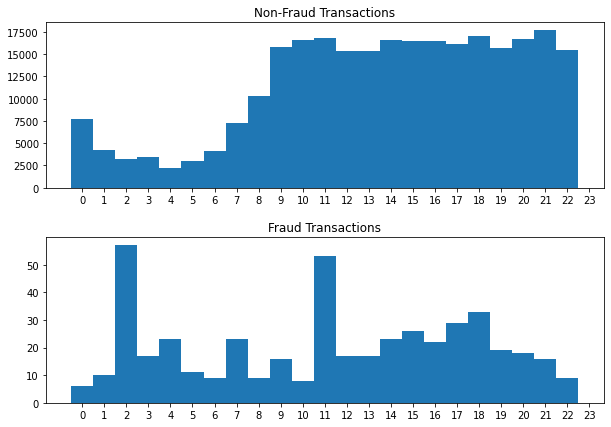

In [ ]:
fig, ax = plt.subplots(2, figsize = (10,7))
for a in ax:

    a.set_xticks(range(24))

df.loc[df["Class"] == 0]["Hour"].hist(bins=np.arange(24)-0.5, ax=ax[0], grid = False)

df.loc[df["Class"] == 1]["Hour"].hist(bins=np.arange(24)-0.5, ax=ax[1], grid = False)

ax[0].title.set_text("Non-Fraud Transactions")

ax[1].title.set_text("Fraud Transactions")

plt.subplots_adjust(hspace=0.3)


From the result above, it appears that most legititmate transactions are conducted during the night time and the rate increase with during working hours. In addition, majority of the fraud transactions seem to take place around 2am. Furthermore, the transaction for Non-fraud transaction looks more evenly spread compared to the fraudulent transactions

**Observe the distribution of classes with amount**

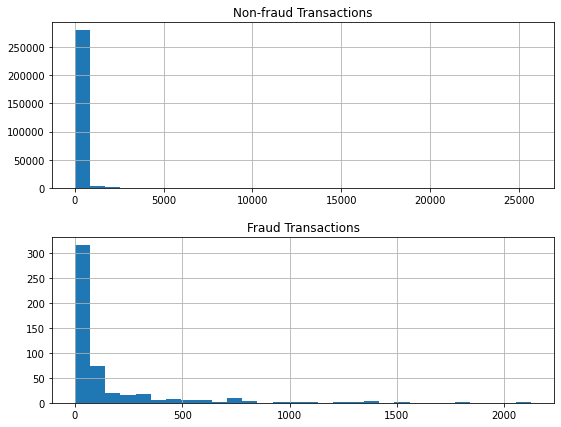

In [ ]:
#Visulation for the distribution of fraud and non-fraud transactions via histogram
fig, ax = plt.subplots(2, figsize=(9,7))

df.loc[df["Class"] == 0]["Amount"].hist(bins=30, ax=ax[0])

df.loc[df["Class"] == 1]["Amount"].hist(bins=30, ax=ax[1])

ax[0].title.set_text("Non-fraud Transactions")

ax[1].title.set_text("Fraud Transactions")

plt.subplots_adjust(hspace=0.3)

*Analysis*

From the histogram, we noticed that the fraud transactions are mostly less and in a lower amount compared to the non fraud cases which are more wide spread in terms of amount.

Correlation Matrix

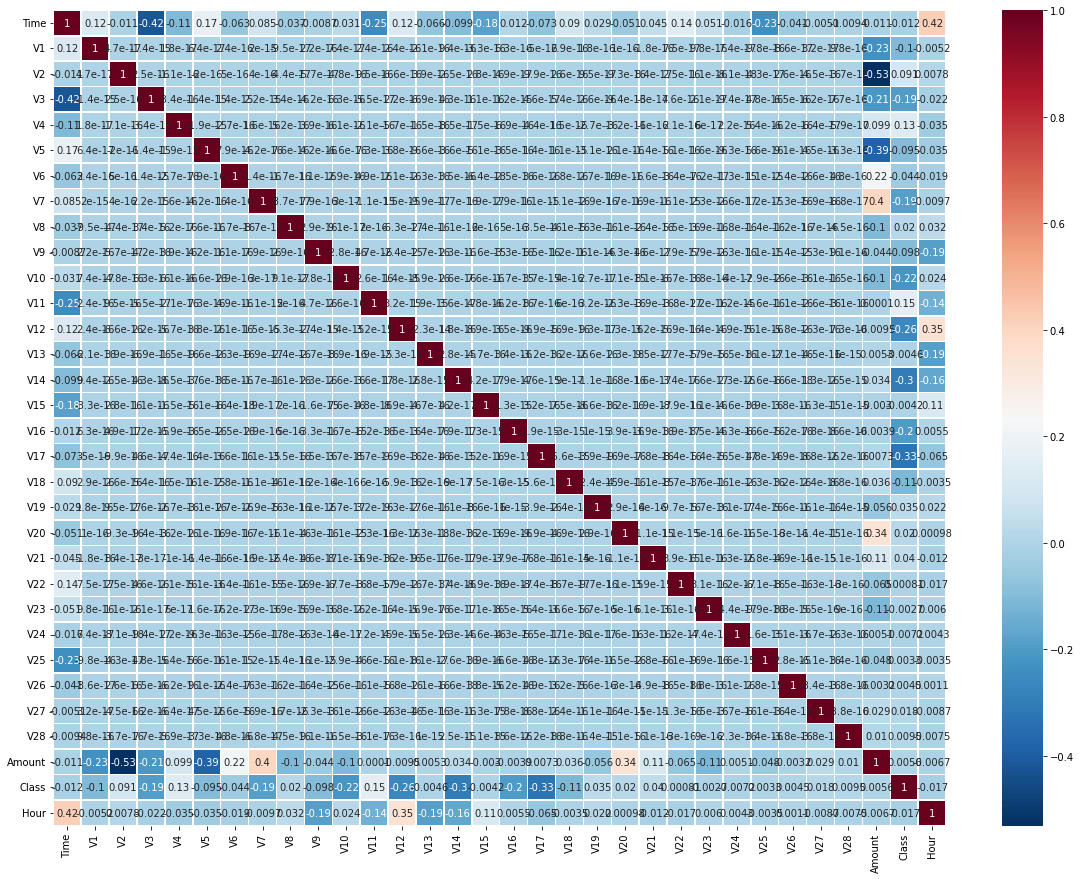

In [ ]:
pearsoncorr = df.corr(method = 'pearson')
plt.subplots(figsize=(20,15))
sns.heatmap(pearsoncorr, xticklabels= pearsoncorr.columns, yticklabels= pearsoncorr.columns,
            cmap = 'RdBu_r', annot = True, linewidth = 0.5)

**Remove duplicates**

In [ ]:
df.shape

(284807, 32)

In [ ]:
duplicateRowsDf = df[df.duplicated()]
df.drop_duplicates(inplace= True)
df.shape

(283726, 32)

There was a total of 1081 duplication transaction in the data set

In [ ]:
from matplotlib.backends.backend_pdf import PdfPages
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from sklearn.impute import MissingIndicator, SimpleImputer
from sklearn.preprocessing import  PolynomialFeatures, KBinsDiscretizer, FunctionTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, LabelBinarizer, OrdinalEncoder
import statsmodels.formula.api as smf
import statsmodels.tsa as tsa
from sklearn.linear_model import LogisticRegression, LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, export_graphviz, export
from sklearn.ensemble import BaggingClassifier, BaggingRegressor,RandomForestClassifier,RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier,GradientBoostingRegressor, AdaBoostClassifier, AdaBoostRegressor 
from sklearn.svm import LinearSVC, LinearSVR, SVC, SVR
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import QuantileTransformer

# **Train-Test Split**

Before attempting Feature Engineering, we need to create another set to prevent it from leaking our information to the test set. 
Training Size will be 70% and Testing Size will be 30%

In [ ]:
train,test = train_test_split(df, test_size=0.3, random_state=20, stratify=df[["Class"]])
tr_value_counts = train["Class"].value_counts()

print("Fraudulent transactions are %.2f%% of the training set." % (tr_value_counts[1] * 100 / len(train)))


tst_value_counts = test["Class"].value_counts()

print("Fraudulent transactions are %.2f%% of the test set." % (tst_value_counts[1] * 100 / len(test)))



Fraudulent transactions are 0.17% of the training set.
Fraudulent transactions are 0.17% of the test set.


Time column will be dropped since hour will be used for the modeling

In [ ]:
train = train.drop(["Time"], axis=1)
test = test.drop(["Time"], axis=1)

In [ ]:
X_train = train.iloc[:, train.columns != "Class"]

y_train = train.iloc[:, train.columns == "Class"]

X_test = test.iloc[:, test.columns != "Class"]

y_test = test.iloc[:, test.columns == "Class"]

In [ ]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour
260077,2.165551,-0.931977,-0.825217,-0.976348,-0.806100,-0.482170,-0.869593,-0.055487,-0.256162,0.927807,0.543879,0.031113,0.013013,-0.149598,-0.635406,1.315547,-0.169662,-0.760603,1.011890,-0.027782,0.225936,0.686494,0.116975,-0.386258,-0.122954,-0.174076,-0.008978,-0.066268,11.00,20
171490,-0.263757,0.333658,1.320915,-0.728436,0.211890,0.026035,0.432156,-0.197118,0.860935,-0.550587,-1.745319,-0.380098,0.015777,-0.536872,0.476001,-0.011856,-0.728361,0.631569,0.541292,0.015915,0.241983,1.030178,-0.374859,-0.657589,-0.293335,0.216249,-0.116099,-0.043637,22.72,9
143414,1.394940,-0.725507,0.513857,-0.737259,-1.243254,-0.672043,-0.872506,0.004601,-0.285987,0.653846,-1.004247,-1.772010,-1.641884,0.088128,1.195414,1.595815,0.081561,-0.927929,0.673075,-0.001526,-0.002746,-0.235306,0.026229,-0.176055,0.246006,-0.330504,0.006173,0.018870,25.48,23
203966,1.839303,-0.658990,-1.318029,0.271534,1.650956,4.230737,-1.334916,1.159807,1.013593,0.144832,-0.219967,0.409759,0.038813,-0.025584,1.058441,0.495287,-0.858105,0.139520,-0.806055,-0.087474,0.074062,0.180545,0.282958,0.660041,-0.314983,-0.738293,0.090650,-0.019662,45.00,13
159774,-0.602259,0.471985,1.262224,-0.466357,0.021201,0.267186,0.245404,0.088205,0.400334,-0.455876,0.153216,0.695694,0.292072,-0.209733,-0.329608,0.147359,-0.850055,1.087295,0.618337,-0.083601,0.387928,1.238425,-0.328957,-0.441262,-0.255920,-0.139216,-0.065400,0.209145,39.95,7


**Feature Scaling**

Since most of the data has already been scaled through PCA. The only attribute left to normalize is Amount.

In [ ]:
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
X_train['Amount'] = robust_scaler.fit_transform(X_train[['Amount']])
X_train['Hour'] = robust_scaler.fit_transform(X_train[['Hour']])

In [ ]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour
260077,2.165551,-0.931977,-0.825217,-0.976348,-0.806100,-0.482170,-0.869593,-0.055487,-0.256162,0.927807,0.543879,0.031113,0.013013,-0.149598,-0.635406,1.315547,-0.169662,-0.760603,1.011890,-0.027782,0.225936,0.686494,0.116975,-0.386258,-0.122954,-0.174076,-0.008978,-0.066268,-0.152985,0.555556
171490,-0.263757,0.333658,1.320915,-0.728436,0.211890,0.026035,0.432156,-0.197118,0.860935,-0.550587,-1.745319,-0.380098,0.015777,-0.536872,0.476001,-0.011856,-0.728361,0.631569,0.541292,0.015915,0.241983,1.030178,-0.374859,-0.657589,-0.293335,0.216249,-0.116099,-0.043637,0.010014,-0.666667
143414,1.394940,-0.725507,0.513857,-0.737259,-1.243254,-0.672043,-0.872506,0.004601,-0.285987,0.653846,-1.004247,-1.772010,-1.641884,0.088128,1.195414,1.595815,0.081561,-0.927929,0.673075,-0.001526,-0.002746,-0.235306,0.026229,-0.176055,0.246006,-0.330504,0.006173,0.018870,0.048399,0.888889
203966,1.839303,-0.658990,-1.318029,0.271534,1.650956,4.230737,-1.334916,1.159807,1.013593,0.144832,-0.219967,0.409759,0.038813,-0.025584,1.058441,0.495287,-0.858105,0.139520,-0.806055,-0.087474,0.074062,0.180545,0.282958,0.660041,-0.314983,-0.738293,0.090650,-0.019662,0.319878,-0.222222
159774,-0.602259,0.471985,1.262224,-0.466357,0.021201,0.267186,0.245404,0.088205,0.400334,-0.455876,0.153216,0.695694,0.292072,-0.209733,-0.329608,0.147359,-0.850055,1.087295,0.618337,-0.083601,0.387928,1.238425,-0.328957,-0.441262,-0.255920,-0.139216,-0.065400,0.209145,0.249644,-0.888889


*Scaling the test set*

In [ ]:
robust_scaler = RobustScaler()
X_test['Amount'] = robust_scaler.fit_transform(X_test[['Amount']])
X_test['Hour'] = robust_scaler.fit_transform(X_test[['Hour']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour
77498,1.044612,0.050072,0.347682,1.437991,-0.157549,-0.143992,0.189803,-0.063823,0.196898,-0.170576,-0.437990,0.836499,0.452189,-0.033973,-0.148883,-0.741747,0.232751,-1.035614,-0.391507,-0.026473,-0.057416,-0.042475,-0.123837,0.113735,0.659664,-0.321384,0.031825,0.028138,0.677097,0.000000
9568,-0.939118,3.126938,-2.255336,1.771850,0.545432,-1.387188,-0.327357,-3.439817,1.297149,-0.796065,2.127740,-2.030422,2.641924,-2.258201,0.134531,0.669302,3.897365,1.557782,-0.830831,-0.483266,2.783637,-1.231198,0.664470,0.273981,-0.367874,-0.484481,-0.076905,-0.174300,-0.293138,-1.333333
161591,1.844826,0.181078,-0.300584,3.836047,0.210215,0.965983,-0.419067,0.342796,-0.358031,1.478006,-0.134069,0.100098,-1.295026,0.078065,-2.447515,0.582341,-0.534397,0.090683,-1.037965,-0.359764,0.124608,0.528761,0.126287,0.681011,0.037316,0.088008,-0.015504,-0.052698,-0.284535,-0.888889
7667,-0.636393,0.820481,2.560305,1.091706,-0.169117,0.350480,0.087370,-0.046477,1.893215,-0.352846,-0.383537,-2.987590,1.076185,0.840979,-0.226339,-0.255486,0.504406,0.671811,0.619927,0.128289,-0.262144,-0.053601,-0.189245,-0.195063,0.009735,-0.354480,0.099431,-0.062962,-0.236245,-1.444444
258332,2.135169,0.039689,-1.745516,0.083085,0.641935,-0.529757,0.244653,-0.315274,0.499787,-0.016461,-1.187295,0.490051,1.081555,0.257164,0.740001,-0.026745,-0.830636,0.091516,0.037289,-0.137786,0.203099,0.762255,-0.060390,0.144227,0.409868,-0.104480,-0.019673,-0.056889,-0.291612,0.555556


# **Checking the Skewness**

In [ ]:
#Looking at the columns for the trainset
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Hour'],
      dtype='object')

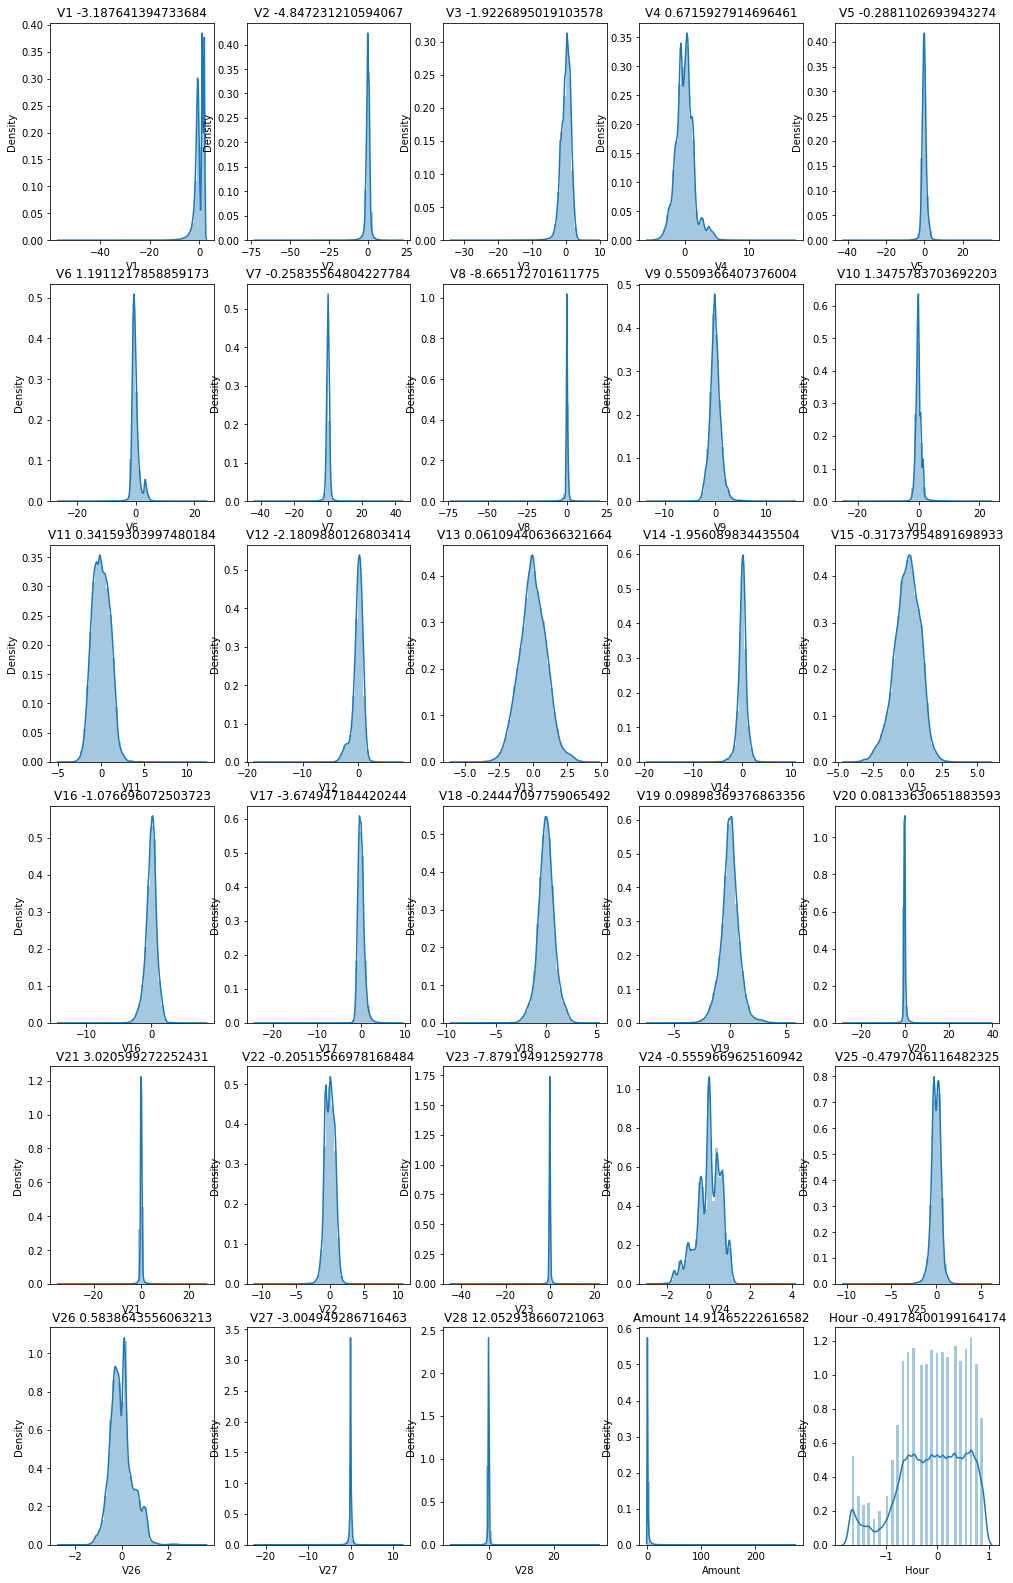

In [ ]:
#Plotting a distribution for the variable to determine the skewness of each variable.
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

From the graph, we noticed that alot of variables are heavily skewed. Therefore, we will only for particular varibles for a normal distribution

**Mitigate skweness with PowerTransformer**

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = 'yeo-johnson', standardize = True, copy = False)
X_train[cols] = pt.fit_transform(X_train)

In [ ]:
X_test[cols] = pt.fit_transform(X_test)

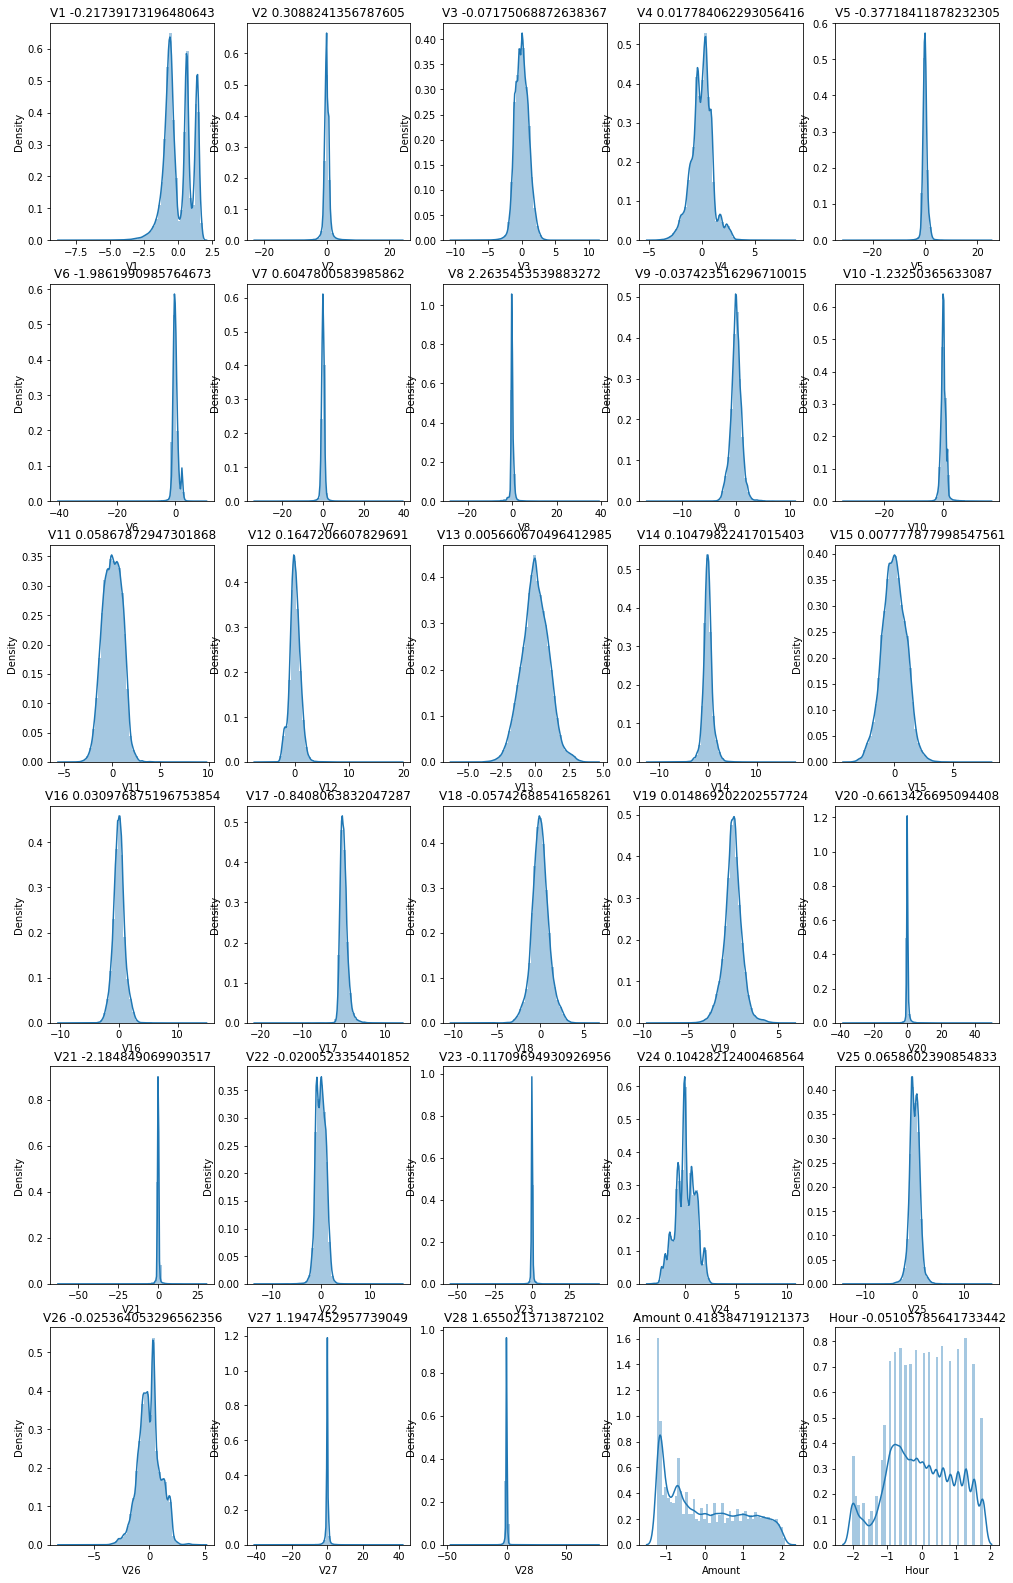

In [ ]:
k=0
plt.figure(figsize=(17,28))
for col in cols :    
    k=k+1
    plt.subplot(6, 5,k)    
    sns.distplot(X_train[col])
    plt.title(col+' '+str(X_train[col].skew()))

After the transformation, the variables are more normally distributed and more stablize.

# **Modelling for Imbalance Data**

The cross varlidation strategy for each model will be 5 folds.

In [ ]:
#Import Metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

#Import for cross validation

# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

*Decision Tree*

In [ ]:
param_grid1 = {
    'max_depth': range(4,8,12),
    'min_samples_leaf': range(50,150,50),
    'min_samples_split': range(50,150,50),
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator= dt, param_grid= param_grid1, scoring= 'roc_auc', cv =5,verbose =1)

In [ ]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   58.7s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': range(4, 8, 12),
                       

In [ ]:
#cv results
cv_result = pd.DataFrame(grid_search.cv_results_)
cv_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.896459,0.023369,0.013598,0.000387,4,50,50,"{'max_depth': 4, 'min_samples_leaf': 50, 'min_...",0.957773,0.886146,0.932446,0.923971,0.901191,0.920306,0.024887,4
1,2.945212,0.018521,0.013953,0.000220,4,50,100,"{'max_depth': 4, 'min_samples_leaf': 50, 'min_...",0.957773,0.886146,0.932446,0.923972,0.901193,0.920306,0.024887,3
2,2.908209,0.027052,0.013845,0.000485,4,100,50,"{'max_depth': 4, 'min_samples_leaf': 100, 'min...",0.957690,0.885744,0.966667,0.923757,0.908751,0.928522,0.030164,1
3,2.934898,0.014355,0.013719,0.000482,4,100,100,"{'max_depth': 4, 'min_samples_leaf': 100, 'min...",0.957690,0.885744,0.966667,0.923757,0.908751,0.928522,0.030164,1


In [ ]:
#Printing the optimal sensitivity score and hyperparameters
print('Best roc_auc: -', grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc: - 0.9285218077337557
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


In [ ]:
#Buliding the model with the best hyperparameters
dt_model = DecisionTreeClassifier(criterion= 'gini', random_state= 20, max_depth= 4, min_samples_leaf = 100, min_samples_split= 100 )

dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=100, min_samples_split=100,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=20, splitter='best')

*Prediction on the test set*

In [ ]:
#Predict Probability
dt_pred = dt_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Classification Report
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.75      0.68      0.71       142

    accuracy                           1.00     85118
   macro avg       0.87      0.84      0.86     85118
weighted avg       1.00      1.00      1.00     85118



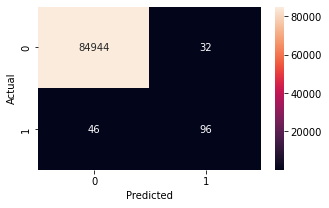

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, dt_pred)
cm = pd.DataFrame(cm, columns = np.unique(y_test), index = np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize= (5,3))
sns.heatmap(cm, fmt = 'g', annot = True)

In [ ]:
confusion = metrics.confusion_matrix(y_test, y_test)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, dt_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, dt_pred))

Accuracy:- 0.9990836250851759
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.7111111111111111


In [ ]:
from sklearn.model_selection import cross_val_score
#Cross Validare Score
dt_scores = cross_val_score(dt_model, X_test, y_test, cv = 5)

print("Decision Tree Cross Validate Score:", np.round(dt_scores.mean()*100,3), '%')

Decision Tree Cross Validate Score: 99.906 %


*Plotting ROC*

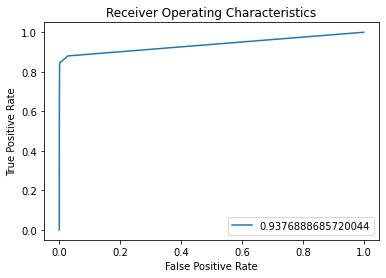

In [ ]:
dt_probs = dt_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, dt_probs)
auc = metrics.roc_auc_score(y_test, dt_probs)

plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, label = str(auc))
plt.legend(loc = 4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

*Precision-Recall Curve*

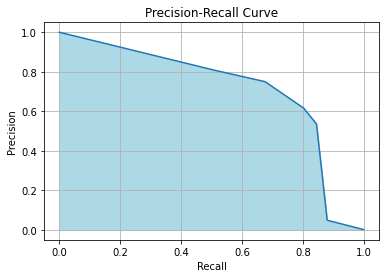

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, dt_probs)
fig, ax = plt.subplots()
ax.plot(recall, precision)

ax.set_title("Precision-Recall Curve")
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.fill_between(recall, precision, color = 'lightblue')
plt.grid()
plt.show()

*Logisitic Regression*

In [ ]:
from sklearn.linear_model import LogisticRegression

#Creating KFold object with 5 split
folds = KFold(n_splits=5, shuffle = True, random_state = 20)

#Specify params
params3 = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_log = GridSearchCV(estimator = LogisticRegression(),
                         param_grid = params3,
                         scoring = 'roc_auc',
                         cv = folds,
                         verbose = 1,
                         return_train_score = True)
#Fit the model
model_log.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   41.4s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=20, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='roc_auc', verbose=1)

In [ ]:
#Logisitics Regression results
log_results = pd.DataFrame(model_log.cv_results_)
log_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.866230,0.048389,0.022222,0.001395,0.01,{'C': 0.01},0.975875,0.970944,0.982676,0.972897,0.981894,0.976857,0.004709,2,0.984255,0.981945,0.981436,0.982309,0.980882,0.982165,0.001150
1,1.317918,0.178260,0.021810,0.000651,0.1,{'C': 0.1},0.974569,0.975639,0.982605,0.976513,0.975934,0.977052,0.002847,1,0.983724,0.980993,0.980056,0.982154,0.980828,0.981551,0.001277
2,1.331486,0.060245,0.023095,0.001756,1,{'C': 1},0.973662,0.975639,0.982747,0.976909,0.974049,0.976601,0.003285,3,0.983080,0.980508,0.979197,0.981688,0.980489,0.980993,0.001308
3,1.362447,0.103477,0.021646,0.000139,10,{'C': 10},0.973520,0.975584,0.982763,0.976936,0.973810,0.976522,0.003358,4,0.982984,0.980443,0.979084,0.981622,0.980445,0.980916,0.001310
4,1.361130,0.086072,0.021432,0.000658,100,{'C': 100},0.973509,0.975576,0.982764,0.976940,0.973787,0.976515,0.003364,5,0.982975,0.980437,0.979073,0.981614,0.980439,0.980907,0.001310
5,1.414125,0.079208,0.022896,0.001706,1000,{'C': 1000},0.973508,0.975575,0.982765,0.976940,0.973784,0.976514,0.003365,6,0.982974,0.980436,0.979072,0.981614,0.980438,0.980907,0.001310


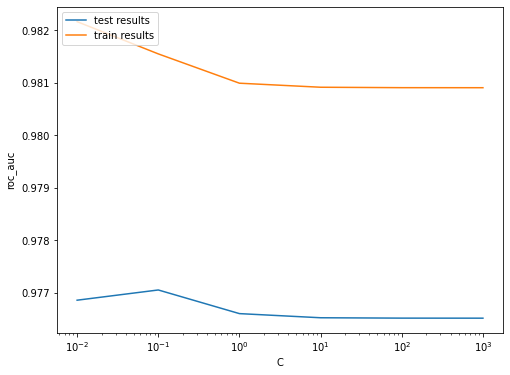

In [ ]:
#plot of C versus train and validation score
plt.figure(figsize=(8,6))
plt.plot(log_results['param_C'], log_results['mean_test_score'])
plt.plot(log_results['param_C'],log_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.legend(['test results','train results'], loc = 'upper left')
plt.xscale('log')

In [ ]:
#Best roc_auc with best c
best_score = model_log.best_score_
best_C = model_log.best_params_['C']

print("The highest test roc auc is", best_score, "at C =", best_C)

The highest test roc auc is 0.9770519129166537 at C = 0.1


In [ ]:
#Logistic Regression with the best C

log_imb = LogisticRegression(C= 0.01, random_state= 20, penalty= 'l2')

In [ ]:
log_tree_model = log_imb.fit(X_train, y_train)

*Prediction on test set*

In [ ]:
#Prediction on test set
log_pred = log_tree_model.predict(X_test)

In [ ]:
print(classification_report(y_test, log_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.90      0.62      0.73       142

    accuracy                           1.00     85118
   macro avg       0.95      0.81      0.87     85118
weighted avg       1.00      1.00      1.00     85118



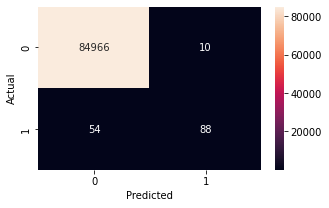

In [ ]:
cm = confusion_matrix(y_test, log_pred)
cm = pd.DataFrame(cm, columns=np.unique(y_test), index= np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize=(5,3))
sns.heatmap(cm, fmt = 'g', annot= True)

In [ ]:
log_confusion = metrics.confusion_matrix(y_test, log_pred)
TP = log_confusion[1,1] # true positive 
TN = log_confusion[0,0] # true negatives
FP = log_confusion[0,1] # false positives
FN = log_confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, log_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, log_pred))

Accuracy:- 0.9992481026339904
Sensitivity:- 0.6197183098591549
Specificity:- 0.9998823197138016
F1-Score:- 0.7333333333333333


In [ ]:
from sklearn.model_selection import cross_val_score
logreg_scores = cross_val_score(log_tree_model, X_train, y_train, cv = 5)

In [ ]:
print("Logisitic Regression Cross Validate Score:", np.round(dt_scores.mean()*100,3), '%')

Logisitic Regression Cross Validate Score: 99.906 %


Plotting ROC

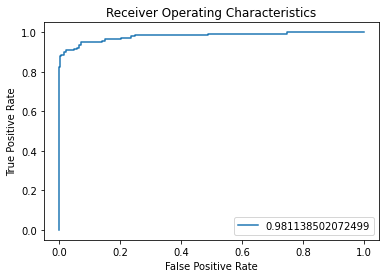

In [ ]:
log_probs = log_tree_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, log_probs)
auc = metrics.roc_auc_score(y_test, log_probs)

plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, label = str(auc))
plt.legend(loc = 4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Plotting Precision Recall Curve

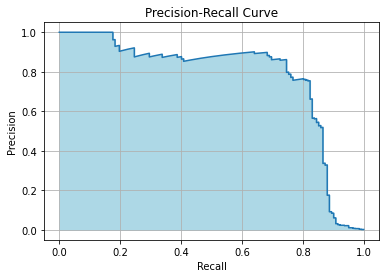

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, log_probs)
fig, ax = plt.subplots()
ax.plot(recall, precision)

ax.set_title("Precision-Recall Curve")
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.fill_between(recall, precision, color = 'lightblue')
plt.grid()
plt.show()

*XGBoost*

In [ ]:
from xgboost import XGBClassifier

Tuning the hyperparameters for XGBoost

In [ ]:
#creating a KFold

folds = 5

#specifying the range of the hyperparameters

param_grid2 = {'learning_rate' : [0.2, 0.6],
               'subsample': [0.2, 0.4, 0.6]}

#Specifying the model
xgb_model = XGBClassifier(max_depth= 4, n_estimators= 100, random_state= 20)

model_xgb = GridSearchCV(estimator= xgb_model, param_grid= param_grid2, scoring= 'roc_auc', cv= folds, verbose= 1, return_train_score= True)

model_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 17.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=4, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=20, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.2, 0.4, 0.6]},
             pre_dispatch='2*n_jobs', refit=True, return_train_sco

In [ ]:
#XGBoost Results
xgb_results = pd.DataFrame(model_xgb.cv_results_)
xgb_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,26.760832,0.450760,0.134867,0.003263,0.2,0.2,"{'learning_rate': 0.2, 'subsample': 0.2}",0.989542,0.961115,0.987328,0.994491,0.968280,0.980151,0.013028,1,0.999284,0.999033,0.999205,0.999269,0.999077,0.999173,1.012159e-04
1,35.766570,0.312305,0.158255,0.005408,0.2,0.4,"{'learning_rate': 0.2, 'subsample': 0.4}",0.984500,0.961223,0.986924,0.984110,0.979880,0.979327,0.009332,2,0.999969,0.999982,0.999981,0.999993,0.999987,0.999982,7.702741e-06
2,41.702091,0.214994,0.165348,0.008021,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.978636,0.958497,0.985220,0.991327,0.968989,0.976534,0.011670,3,1.000000,1.000000,0.999999,1.000000,1.000000,1.000000,2.450791e-07
3,25.254666,0.301248,0.149315,0.002141,0.6,0.2,"{'learning_rate': 0.6, 'subsample': 0.2}",0.978869,0.927508,0.987570,0.969455,0.961604,0.965001,0.020682,5,0.999188,0.999855,0.998551,0.999470,0.998974,0.999207,4.413861e-04
4,32.450620,0.321793,0.162210,0.004889,0.6,0.4,"{'learning_rate': 0.6, 'subsample': 0.4}",0.983099,0.915631,0.979021,0.964423,0.974855,0.963406,0.024683,6,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00
5,37.285458,0.644867,0.161753,0.007238,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.970247,0.953267,0.982994,0.987982,0.960911,0.971080,0.013031,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000e+00


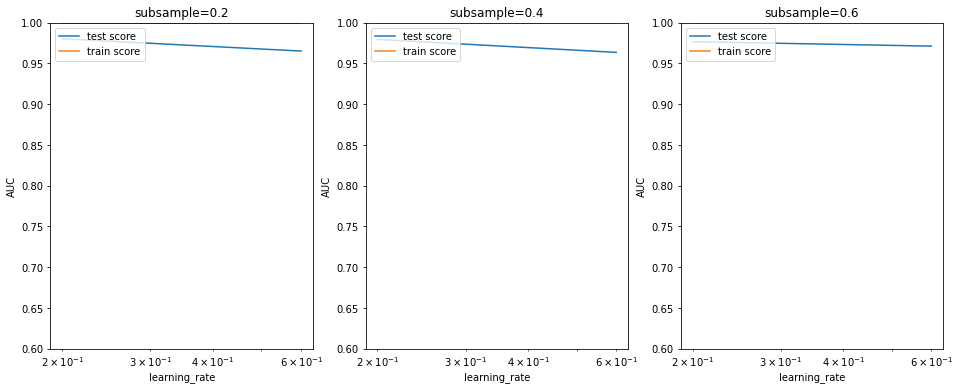

In [ ]:
plt.figure(figsize= (16,6))

param_grid3 = {'learning_rate' : [0.2, 0.6],
               'subsample': [0.2, 0.4, 0.6]}

for n , subsample in enumerate (param_grid3['subsample']):
  
  plt.subplot(1,len(param_grid3['subsample']), n+1)
  df = xgb_results[xgb_results['param_subsample']==subsample]
  
  plt.plot(df["param_learning_rate"], df["mean_test_score"])
  plt.plot(df["param_learning_rate"], df["mean_train_score"])
  plt.xlabel('learning_rate')
  plt.ylabel('AUC')
  plt.title("subsample={0}".format(subsample))
  plt.ylim([0.60, 1])
  plt.legend(['test score', 'train score'], loc='upper left')
  plt.xscale('log')

Model with best hyperparameters

In [ ]:
model_xgb.best_params_

{'learning_rate': 0.2, 'subsample': 0.2}

In [ ]:
params1 = {'learning_rate': 0.2,
          'max_depth': 4, 
          'n_estimators':100,
          'subsample':0.2,
          'random state' : 20,
         'objective':'binary:logistic'}

xgb_imb = XGBClassifier(params = params1)
xgb_imb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic',
              params={'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 100,
                      'objective': 'binary:logistic', 'random state': 20,
                      'subsample': 0.2},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

*Prediction on test set*

In [ ]:
#Prediction on test set
xgb_pred = xgb_imb.predict(X_test)

In [ ]:
#Classification Report
print(classification_report(y_test, xgb_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84976
           1       0.91      0.78      0.84       142

    accuracy                           1.00     85118
   macro avg       0.95      0.89      0.92     85118
weighted avg       1.00      1.00      1.00     85118



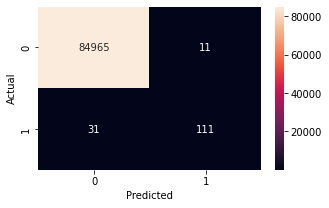

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, xgb_pred)
cm = pd.DataFrame(cm, columns=np.unique(y_test), index=np.unique(y_test))
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
plt.figure(figsize = (5,3))
sns.heatmap(cm, fmt='g', annot = True)

In [ ]:
xgb_confusion = metrics.confusion_matrix(y_test, xgb_pred)
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, xgb_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test, xgb_pred))

Accuracy:- 0.9995065673535563
Sensitivity:- 1.0
Specificity:- 1.0
F1-Score:- 0.8409090909090909


In [ ]:
#Predicted Probability
xgb_proba = xgb_imb.predict_proba(X_test)[:,1]

Plotting ROC

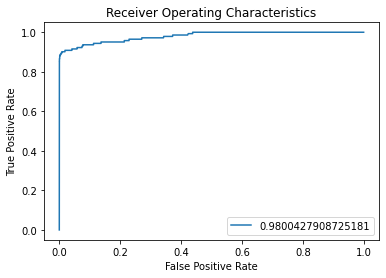

In [ ]:
#Plotting ROC Curve
fpr, tpr, _ = metrics.roc_curve(y_test, xgb_proba)
auc = metrics.roc_auc_score(y_test, xgb_proba)

plt.title('Receiver Operating Characteristics')
plt.plot(fpr, tpr, label = str(auc))
plt.legend(loc = 4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Plotting Preicison-Recall Curve

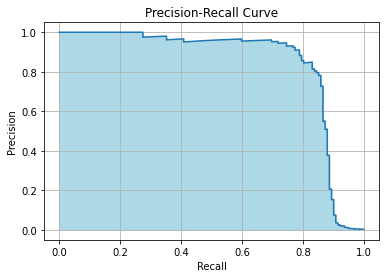

In [ ]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, xgb_proba)
fig, ax = plt.subplots()
ax.plot(recall, precision)

ax.set_title("Precision-Recall Curve")
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
ax.fill_between(recall, precision, color = 'lightblue')
plt.grid()
plt.show()